In [1]:
from os import walk
from tqdm import tqdm
from PIL import Image
import torch
from tqdm import tqdm
import glob
import numpy as np

# Prepare data

In [2]:
path = "../construction_images/data/pretrain/images/"

files = glob.glob(path + "*.jpg")

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5l', pretrained=True, device='cuda:0', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/kit/stud/utpqw/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-12 Python-3.8.6 torch-1.7.1 CUDA:0 (Tesla V100-SXM2-32GB, 32511MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


In [4]:
images = []
for file in tqdm(files):
    image = Image.open(file)
    images.append(image)

100%|██████████| 33344/33344 [03:51<00:00, 144.05it/s]


In [5]:
batch_size = 25
batches = np.arange(0, len(images), batch_size)

# Classify Pretrain dataset using YoloV5l

In [6]:
results = []
for x in tqdm(range(len(batches) - 1)):
    results += model(images[batches[x]:batches[x+1]], size=400).pandas().xyxy

100%|██████████| 1333/1333 [05:35<00:00,  3.97it/s]


In [7]:
labels = {}
for x in range(len(results)):
    name = files[x].split('/')[-1]
    labels[name] = {}
    labels[name]['labels'] = []
    for row in results[x].iterrows():
        if row[-1]['confidence'] > 0.8:
            labels[name]['labels'].append(row[-1]['name'])

In [8]:
categories = set()

for image in labels.keys():
    for label in labels[image]['labels']:
        categories.add(label)

In [9]:
import json

with open('labels.json', 'w') as fp:
    json.dump(labels, fp)

In [10]:
categories = list(categories)
tasks = []

for category in categories: 
    task = {}
    task['label'] = category
    task['images-positive'] = []    
    task['images-negative'] = []
    
    for image in labels.keys():
        if category in labels[image]['labels']:
            task['images-positive'].append(image)
        else:
            if len(task['images-negative']) < 30:
                task['images-negative'].append(image)
                
    tasks.append(task)

person


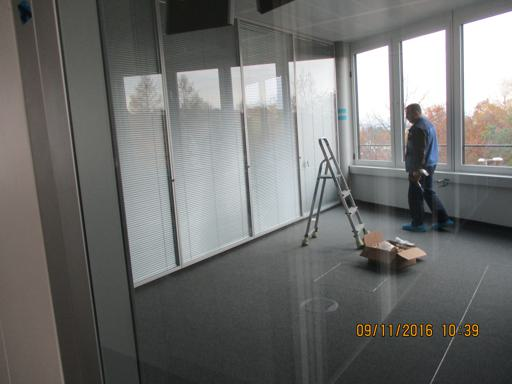

In [24]:
x = 3

im = Image.open(path + tasks[x]['images-positive'][9])
print(tasks[x]['label'])
im

In [11]:
with open('tasks.json', 'w') as fp:
    json.dump(tasks, fp)
tasks

[{'label': 'tv',
  'images-positive': ['32591.jpg',
   '13105.jpg',
   '08161.jpg',
   '12769.jpg',
   '07403.jpg',
   '23945.jpg',
   '32642.jpg',
   '16577.jpg',
   '10719.jpg',
   '08816.jpg',
   '21515.jpg',
   '05741.jpg',
   '27142.jpg',
   '08862.jpg',
   '15997.jpg',
   '23782.jpg',
   '13505.jpg',
   '03325.jpg',
   '11289.jpg'],
  'images-negative': ['14337.jpg',
   '15529.jpg',
   '18266.jpg',
   '07425.jpg',
   '26957.jpg',
   '05648.jpg',
   '32252.jpg',
   '23088.jpg',
   '12131.jpg',
   '13794.jpg',
   '03344.jpg',
   '06848.jpg',
   '30328.jpg',
   '15810.jpg',
   '28164.jpg',
   '20304.jpg',
   '29008.jpg',
   '07788.jpg',
   '25865.jpg',
   '30623.jpg',
   '09853.jpg',
   '08668.jpg',
   '33514.jpg',
   '21007.jpg',
   '32328.jpg',
   '05021.jpg',
   '04617.jpg',
   '21296.jpg',
   '03469.jpg',
   '05284.jpg']},
 {'label': 'microwave',
  'images-positive': ['32144.jpg',
   '29441.jpg',
   '32472.jpg',
   '31566.jpg',
   '31595.jpg',
   '31216.jpg',
   '31886.jpg',
   